In [19]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import adam_v2
from keras.layers import Dropout
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
gas = pd.read_csv('D:/study docs/Excel R/assignment/Neural Networks/gas_turbines.csv')
gas.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
gas.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [5]:
gas[gas.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


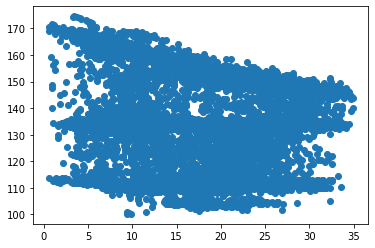

In [6]:
plt.scatter(gas.AT,gas.TEY)

In [7]:
gas.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


In [8]:
gas.dtypes 

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [9]:
gas1 = gas.drop(['AT','AP','AH','NOX'],axis = 1)

In [10]:
gas1.head()

,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
0,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547
1,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363
2,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012
3,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923
4,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484


In [13]:
X = gas1.loc[:,gas1.columns != 'TEY'].values
Y = gas1['TEY'].values

In [14]:
sc = StandardScaler()
sc.fit(X)
X_standardized = sc.transform(X)

In [15]:
X_standardized

array([[-0.92123188, -1.37910125, -1.48837592,  0.58524028, -1.35733078,
         0.53201195],
       [-0.92149498, -1.36352783, -1.4823253 ,  0.58524028, -1.36367619,
         0.56873344],
       [-0.94438456, -1.35130868, -1.47627469,  0.56871459, -1.36095673,
         0.5529378 ],
       ...,
       [-0.95148822, -1.41096688, -2.78925732, -1.02664984, -1.46792219,
         2.69592467],
       [-0.98884822, -1.44762432, -2.4564737 , -0.52833681, -1.42259784,
         1.9246834 ],
       [-1.01660512, -1.46463529, -2.05108275,  0.05768949, -1.37727349,
         1.35415028]])

In [16]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=6, kernel_initializer = 'normal', activation='relu'))
    model.add(Dense(8, kernel_initializer = 'normal', activation='relu'))
    model.add(Dense(1, kernel_initializer = 'normal', activation='linear'))
    
    adam = adam_v2.Adam(learning_rate=0.01)
    model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])
    return model

In [17]:
model = KerasClassifier(build_fn = create_model,verbose = 0)
batch_size = [10,20,40]
epochs = [10,50,100]
param_grid = dict(batch_size = batch_size,epochs = epochs)
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

<ipython-input-17-67f9ff56ed62>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ..................batch_size=10, epochs=10; total time=   9.3s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END ..................batch_size=10, epochs=10; total time=   9.3s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END ..................batch_size=10, epochs=10; total time=   8.6s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END ..................batch_size=10, epochs=10; total time=   8.8s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END ..................batch_size=10, epochs=10; total time=   8.9s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END ..................batch_size=10

In [18]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best : 6.65114726871252e-05, using {'batch_size': 20, 'epochs': 100}


In [20]:
from keras.layers import Dropout


def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 6,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 8,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'linear'))
    
    adam = adam_v2.Adam(lr = learning_rate)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['accuracy'])
    return model

model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)


learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]


param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)


grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

<ipython-input-20-e7141d47d29d>:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=  41.5s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=  41.8s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=  42.3s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=  42.8s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time= 1.3min
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time= 1.1min
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time= 1.2min
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=  50.6s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=  49.3s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time= 1.1min
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time= 1.4min
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time= 1.4min
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time= 1.6min
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=  48.5s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time= 1.0min
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=  47.3s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=  47.9s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=  48.1s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=  49.4s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=  48.9s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=  52.0s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=  49.5s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=  50.1s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=  54.4s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=  47.5s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=  50.8s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=  53.6s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=  58.9s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time= 1.0min
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=  58.6s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=  60.0s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=  55.1s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=  53.8s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=  53.5s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=  47.1s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=  52.3s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=  53.6s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=  54.7s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=  55.0s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=  54.5s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=  55.7s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=  55.4s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=  53.8s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=  57.3s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=  57.6s


In [25]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best : -5.039669156074524, using {'dropout_rate': 0.0, 'learning_rate': 0.001}


In [26]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 6,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0))
    model.add(Dense(4,input_dim = 8,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0))
    model.add(Dense(1,activation = 'linear'))
    
    adam = adam_v2.Adam(lr = 0.001)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

<ipython-input-26-714a62bdd5f0>:15: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)
C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform; total time=  48.8s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/12] END activation_function=softmax, init=uniform; total time=  57.7s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/12] END activation_function=softmax, init=uniform; total time=  47.7s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/12] END activation_function=softmax, init=uniform; total time=  49.7s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/12] END activation_function=softmax, init=uniform; total time=  51.8s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/12] END .activation_function=softmax, init=normal; total time=  57.2s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/12] END .activation_function=softmax, init=normal; total time=  58.5s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/12] END .activation_function=softmax, init=normal; total time=  56.4s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/12] END .activation_function=softmax, init=normal; total time=  55.5s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/12] END .activation_function=softmax, init=normal; total time=  59.5s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/12] END ...activation_function=softmax, init=zero; total time=  51.4s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/12] END ...activation_function=softmax, init=zero; total time=  48.2s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/12] END ...activation_function=softmax, init=zero; total time=  53.5s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/12] END ...activation_function=softmax, init=zero; total time= 1.6min
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/12] END ...activation_function=softmax, init=zero; total time= 1.1min
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/12] END ...activation_function=relu, init=uniform; total time= 1.6min
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/12] END ...activation_function=relu, init=uniform; total time= 1.7min
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/12] END ...activation_function=relu, init=uniform; total time= 1.6min
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/12] END ...activation_function=relu, init=uniform; total time= 1.5min
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/12] END ...activation_function=relu, init=uniform; total time= 1.3min
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/12] END ....activation_function=relu, init=normal; total time= 1.6min
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/12] END ....activation_function=relu, init=normal; total time= 1.3min
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/12] END ....activation_function=relu, init=normal; total time= 1.0min
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/12] END ....activation_function=relu, init=normal; total time=  59.3s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/12] END ....activation_function=relu, init=normal; total time=  60.0s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/12] END ......activation_function=relu, init=zero; total time=  54.4s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/12] END ......activation_function=relu, init=zero; total time=  58.0s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/12] END ......activation_function=relu, init=zero; total time=  53.8s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/12] END ......activation_function=relu, init=zero; total time=  52.7s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/12] END ......activation_function=relu, init=zero; total time=  51.5s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/12] END ...activation_function=tanh, init=uniform; total time=  45.4s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/12] END ...activation_function=tanh, init=uniform; total time=  40.3s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/12] END ...activation_function=tanh, init=uniform; total time=  40.8s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/12] END ...activation_function=tanh, init=uniform; total time=  39.4s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/12] END ...activation_function=tanh, init=uniform; total time=  39.5s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/12] END ....activation_function=tanh, init=normal; total time=  40.7s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/12] END ....activation_function=tanh, init=normal; total time=  40.4s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/12] END ....activation_function=tanh, init=normal; total time=  40.4s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/12] END ....activation_function=tanh, init=normal; total time=  40.6s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/12] END ....activation_function=tanh, init=normal; total time=  54.0s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/12] END ......activation_function=tanh, init=zero; total time= 1.0min
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/12] END ......activation_function=tanh, init=zero; total time=  51.4s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/12] END ......activation_function=tanh, init=zero; total time=  53.3s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/12] END ......activation_function=tanh, init=zero; total time=  49.6s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/12] END ......activation_function=tanh, init=zero; total time=  49.4s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 10/12] END activation_function=linear, init=uniform; total time=  49.5s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 10/12] END activation_function=linear, init=uniform; total time=  50.0s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 10/12] END activation_function=linear, init=uniform; total time=  49.4s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 10/12] END activation_function=linear, init=uniform; total time=  50.1s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 10/12] END activation_function=linear, init=uniform; total time=  49.7s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 11/12] END .activation_function=linear, init=normal; total time=  49.9s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 11/12] END .activation_function=linear, init=normal; total time=  50.6s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 11/12] END .activation_function=linear, init=normal; total time=  54.1s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 11/12] END .activation_function=linear, init=normal; total time=  52.7s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 11/12] END .activation_function=linear, init=normal; total time=  53.3s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 12/12] END ...activation_function=linear, init=zero; total time=  53.6s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 12/12] END ...activation_function=linear, init=zero; total time=  52.5s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 12/12] END ...activation_function=linear, init=zero; total time=  53.8s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 12/12] END ...activation_function=linear, init=zero; total time=  52.4s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 12/12] END ...activation_function=linear, init=zero; total time=  56.6s


In [27]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best : -4.744383215904236, using {'activation_function': 'relu', 'init': 'uniform'}


In [29]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 6,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0))
    model.add(Dense(1,activation = 'relu'))
    
    adam = adam_v2.Adam(lr = 0.001)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

<ipython-input-29-87f1a136f477>:15: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)
C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END ......................neuron1=4, neuron2=2; total time=  43.5s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END ......................neuron1=4, neuron2=2; total time=  43.4s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END ......................neuron1=4, neuron2=2; total time=  45.8s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END ......................neuron1=4, neuron2=2; total time=  52.7s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END ......................neuron1=4, neuron2=2; total time=  46.8s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END ......................neuron1=4, neuron2=4; total time=  48.3s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END ......................neuron1=4, neuron2=4; total time=  54.4s
[CV 3/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END ......................neuron1=4, neuron2=4; total time=  54.8s
[CV 4/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END ......................neuron1=4, neuron2=4; total time=  56.4s
[CV 5/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END ......................neuron1=4, neuron2=4; total time=  54.5s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END ......................neuron1=4, neuron2=8; total time=  54.4s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END ......................neuron1=4, neuron2=8; total time=  54.9s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END ......................neuron1=4, neuron2=8; total time=  56.6s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END ......................neuron1=4, neuron2=8; total time=  57.2s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END ......................neuron1=4, neuron2=8; total time=  57.7s
[CV 1/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END ......................neuron1=8, neuron2=2; total time=  56.4s
[CV 2/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END ......................neuron1=8, neuron2=2; total time=  55.4s
[CV 3/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END ......................neuron1=8, neuron2=2; total time=  56.2s
[CV 4/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END ......................neuron1=8, neuron2=2; total time=  55.5s
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END ......................neuron1=8, neuron2=2; total time=  55.2s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END ......................neuron1=8, neuron2=4; total time=  56.2s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END ......................neuron1=8, neuron2=4; total time=  55.9s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END ......................neuron1=8, neuron2=4; total time= 1.0min
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END ......................neuron1=8, neuron2=4; total time= 1.0min
[CV 5/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END ......................neuron1=8, neuron2=4; total time=  57.2s
[CV 1/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END ......................neuron1=8, neuron2=8; total time=  57.8s
[CV 2/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END ......................neuron1=8, neuron2=8; total time=  56.9s
[CV 3/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END ......................neuron1=8, neuron2=8; total time=  57.3s
[CV 4/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END ......................neuron1=8, neuron2=8; total time=  57.8s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END ......................neuron1=8, neuron2=8; total time=  59.0s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END .....................neuron1=16, neuron2=2; total time=  59.6s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END .....................neuron1=16, neuron2=2; total time=  54.6s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END .....................neuron1=16, neuron2=2; total time=  56.4s
[CV 4/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END .....................neuron1=16, neuron2=2; total time=  56.8s
[CV 5/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END .....................neuron1=16, neuron2=2; total time=  58.5s
[CV 1/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END .....................neuron1=16, neuron2=4; total time=  58.3s
[CV 2/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END .....................neuron1=16, neuron2=4; total time=  58.6s
[CV 3/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END .....................neuron1=16, neuron2=4; total time=  59.1s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END .....................neuron1=16, neuron2=4; total time=  59.1s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END .....................neuron1=16, neuron2=4; total time= 1.1min
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END .....................neuron1=16, neuron2=8; total time= 1.7min
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END .....................neuron1=16, neuron2=8; total time= 1.0min
[CV 3/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END .....................neuron1=16, neuron2=8; total time=  57.9s
[CV 4/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END .....................neuron1=16, neuron2=8; total time=  59.1s
[CV 5/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END .....................neuron1=16, neuron2=8; total time=  57.8s


In [31]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best : -3.514812469482422, using {'neuron1': 16, 'neuron2': 8}


In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 6,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0))
    model.add(Dense(8,input_dim = 16,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0))
    model.add(Dense(1,activation = 'relu'))
    
    adam = adam_v2.Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['accuracy'])
    return model


model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)

model.fit(X_standardized,Y)

y_predict = model.predict(X_standardized)

<ipython-input-37-a642c4e380b7>:14: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)
